In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

total = pd.read_csv('totalData.csv', delimiter='\t')

/var/folders/rv/q52q8kmj0s558xpyhlshtzw00000gn/T/ipykernel_78859/3169535150.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  total = pd.read_csv('totalData.csv', delimiter='\t')


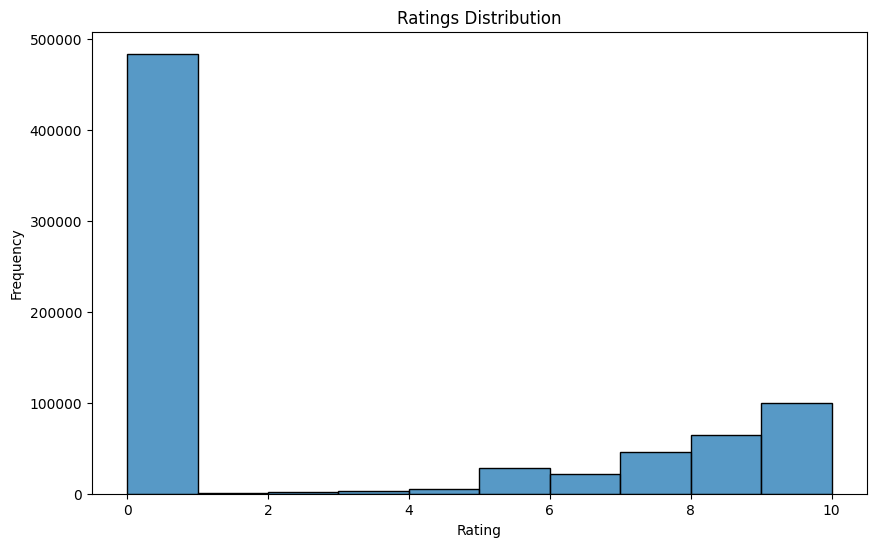

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(total['Book-Rating'], bins=10)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Why so many zeroes?

It is possible a "zero" may be an indicator of no rating provided, rather than a rating of 0/10. If we assume this, the distribution looks very different:

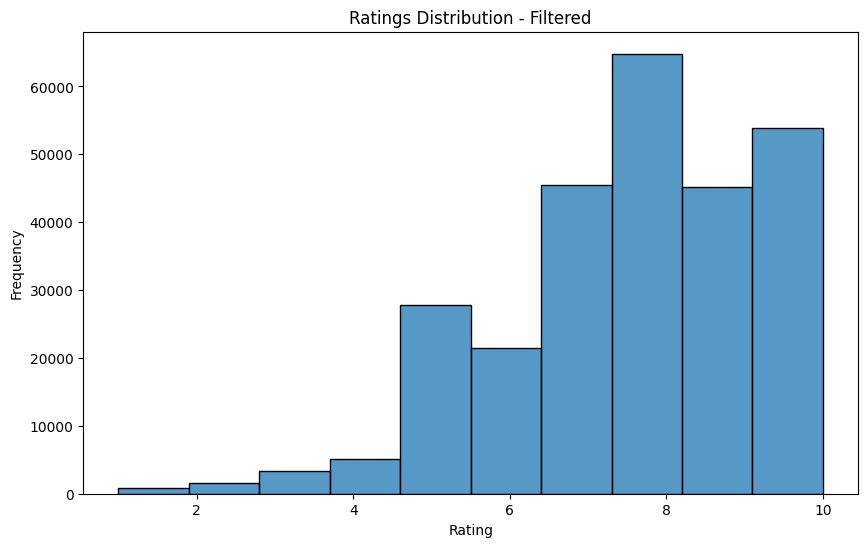

In [4]:
no_zero = total[total['Book-Rating'] != 0]
plt.figure(figsize=(10, 6))
sns.histplot(no_zero['Book-Rating'], bins=10)
plt.title('Ratings Distribution - Filtered')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [5]:
meanRating = total['Book-Rating'].mean()
medianRating = total['Book-Rating'].median()

meanRating_filter = no_zero['Book-Rating'].mean()
medianRating_filter = no_zero['Book-Rating'].median()

print('Mean before filtering: ' + str(meanRating))
print('Mean after filtering: ' + str(meanRating_filter))
print('-------------------------')
print('Median before filtering: ' + str(medianRating))
print('Median after filtering: ' + str(medianRating_filter))


Mean before filtering: 2.7688879684905157
Mean after filtering: 7.736140525263615
-------------------------
Median before filtering: 0.0
Median after filtering: 8.0


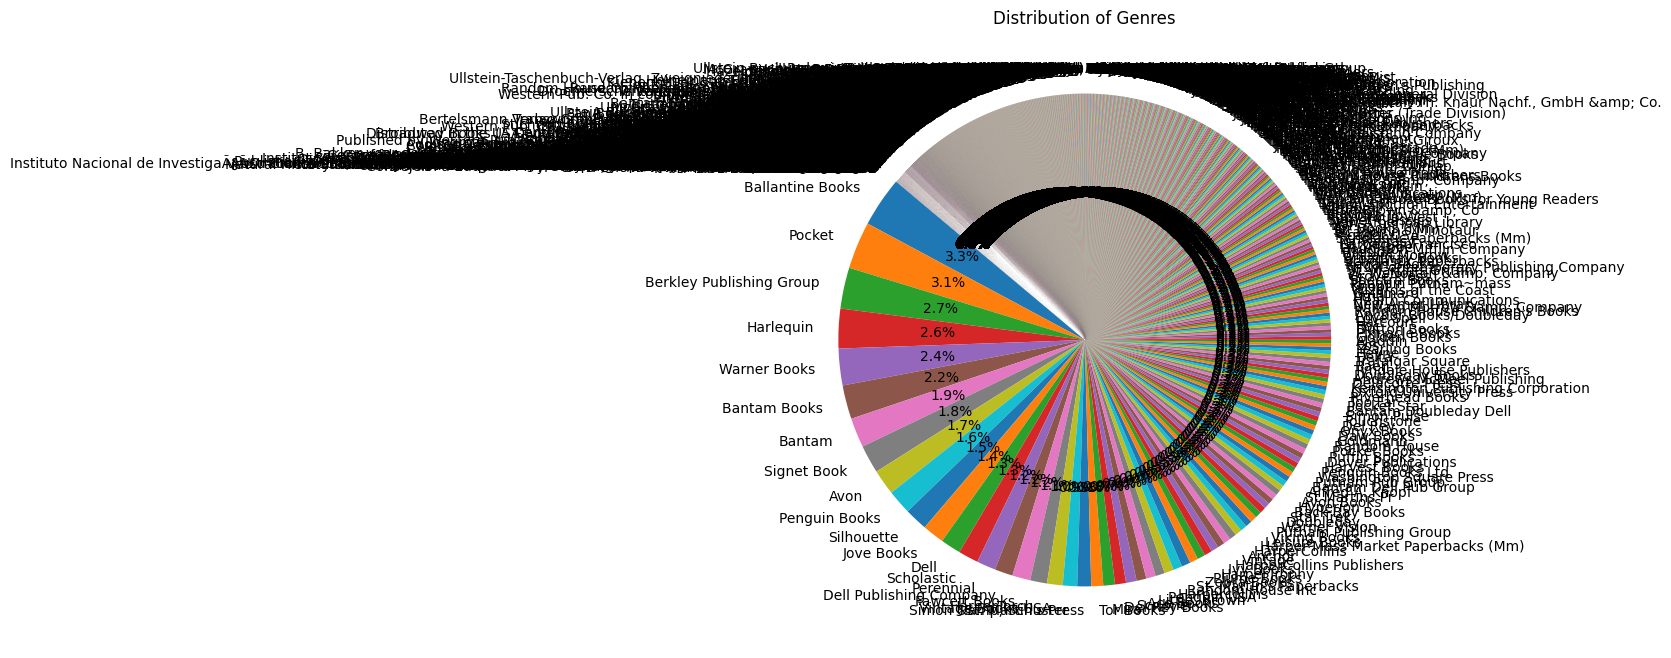

In [9]:
plt.figure(figsize=(8, 8))
pubs = total['Publisher'].value_counts()
plt.pie(pubs, labels=pubs.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Publishers')
plt.show()


## Too many publishers!

The pie chart quickly becomes unreadable -- there are many more publishers in the dataset than I initially expected! To fix this, I will remake this by only looking at the top ten publishers, only for the sake of publisher analysis.

14502

Publisher
Ballantine Books            24707
Pocket                      23352
Berkley Publishing Group    20247
Harlequin                   19564
Warner Books                18118
Bantam Books                16727
Bantam                      14600
Signet Book                 13921
Avon                        12563
Penguin Books               12088
Name: count, dtype: int64


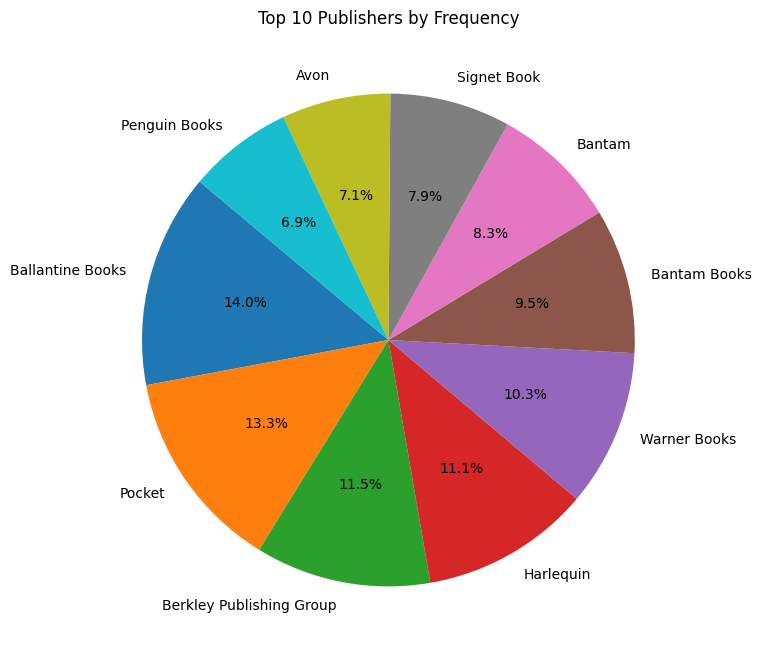

In [12]:
differentPublishers = total['Publisher'].nunique()
print(differentPublishers)
print()

tenPubs = total['Publisher'].value_counts().head(10)
print(tenPubs)

plt.figure(figsize=(8, 8))
plt.pie(tenPubs, labels=tenPubs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Publishers by Frequency')
plt.show()